In [1]:
import pandas as pd
import numpy as np
import ast

In [2]:
# Load data from CSV file into Pandas dataframe
df_tweets = pd.read_csv("../Data/cleaned_tweets.csv")
df_tweets.drop(['Unnamed: 0'], axis=1, inplace=True)
df_tweets.head(20)

,id,entity,sentiment,tweet
0,2401,Borderlands,Positive,"['im', 'get', 'borderland', 'murder']"
1,2401,Borderlands,Positive,"['come', 'border', 'kill']"
2,2401,Borderlands,Positive,"['im', 'get', 'borderland', 'kill']"
3,2401,Borderlands,Positive,"['im', 'come', 'borderland', 'murder']"
4,2401,Borderlands,Positive,"['im', 'get', 'borderland', '2', 'murder']"
5,2401,Borderlands,Positive,"['im', 'get', 'borderland', 'murder']"
6,2402,Borderlands,Positive,"['spent', 'hour', 'make', 'someth', 'fun', '. ..."
7,2402,Borderlands,Positive,"['spent', 'coupl', 'hour', 'someth', 'fun', 'k..."
8,2402,Borderlands,Positive,"['spent', 'hour', 'someth', 'fun', 'know', ""i'..."
9,2402,Borderlands,Positive,"['spent', 'hour', 'make', 'someth', 'fun', '. ..."


In [3]:
def merge_tweet_tokens(tweet_list):
    tweet_list = ast.literal_eval(tweet_list)
    return " ".join(tweet_list)

In [4]:
df_tweets["tweet"] = df_tweets["tweet"].apply(merge_tweet_tokens)
df_tweets.head(10)

,id,entity,sentiment,tweet
0,2401,Borderlands,Positive,im get borderland murder
1,2401,Borderlands,Positive,come border kill
2,2401,Borderlands,Positive,im get borderland kill
3,2401,Borderlands,Positive,im come borderland murder
4,2401,Borderlands,Positive,im get borderland 2 murder
5,2401,Borderlands,Positive,im get borderland murder
6,2402,Borderlands,Positive,spent hour make someth fun . . . know huge fan...
7,2402,Borderlands,Positive,spent coupl hour someth fun know i'm huge bord...
8,2402,Borderlands,Positive,spent hour someth fun know i'm huge borderland...
9,2402,Borderlands,Positive,spent hour make someth fun . . . know huge rha...


In [5]:
df_tweets['datapoint_id'] = df_tweets.index
df_tweets.head(5)

,id,entity,sentiment,tweet,datapoint_id
0,2401,Borderlands,Positive,im get borderland murder,0
1,2401,Borderlands,Positive,come border kill,1
2,2401,Borderlands,Positive,im get borderland kill,2
3,2401,Borderlands,Positive,im come borderland murder,3
4,2401,Borderlands,Positive,im get borderland 2 murder,4


In [6]:
df_tweets['sentiment'].unique()

array(['Positive', 'Negative'], dtype=object)

In [7]:
len(df_tweets)

43013

In [8]:
# Create list of length 43013 with nested lists of IDs with same class
eval_list = []

In [9]:
# Create vocabulary(Bag of words)
# bag_of_words = []

In [10]:
positive_data_points = list(df_tweets[df_tweets['sentiment'] == 'Positive']['datapoint_id'])

In [11]:
negative_data_points = list(df_tweets[df_tweets['sentiment'] == 'Negative']['datapoint_id'])

In [12]:
for index, row in df_tweets.iterrows():
    temp_arr = []
    # current_tweet = ast.literal_eval(row['tweet'])
    # current_tweet = [tweet.strip() for tweet in current_tweet]
    # bag_of_words.extend(current_tweet)
    current_data_point_array = [row['datapoint_id']]
    if row['sentiment'] == 'Positive':
        temp_arr = list(positive_data_points)
    else:
        temp_arr = list(negative_data_points)
    temp_arr.remove(row['datapoint_id'])
    current_data_point_array.extend(temp_arr)
    eval_list.append(current_data_point_array)

In [13]:
# bag_of_words = list(set(bag_of_words))
# print(bag_of_words[:10])

In [14]:
len(eval_list)

43013

In [15]:
eval_list[1].index(1)

0

### Create a copy of original dataset to perform k-means by removing the labels

In [16]:
df_kmeans = df_tweets.copy(deep=True)
df_kmeans.drop(['sentiment', 'id', 'entity'], axis=1, inplace=True)

In [17]:
df_kmeans.head(10)

,tweet,datapoint_id
0,im get borderland murder,0
1,come border kill,1
2,im get borderland kill,2
3,im come borderland murder,3
4,im get borderland 2 murder,4
5,im get borderland murder,5
6,spent hour make someth fun . . . know huge fan...,6
7,spent coupl hour someth fun know i'm huge bord...,7
8,spent hour someth fun know i'm huge borderland...,8
9,spent hour make someth fun . . . know huge rha...,9


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [19]:
# bag_of_words[0:20]

In [20]:
# Considering 3 grams and mimnimum frq as 0
tf_idf_vect = TfidfVectorizer(analyzer='word',ngram_range=(2,2), min_df = 0.0001)
tf_idf_vect.fit(df_kmeans["tweet"])
desc_matrix = tf_idf_vect.transform(df_kmeans["tweet"])

In [21]:
# implement kmeans
num_clusters = 2
km = KMeans(n_clusters=num_clusters)
km.fit(desc_matrix)
clusters = km.labels_.tolist()

In [22]:

# create DataFrame films from all of the input files.
tweets = {'Tweet': df_kmeans["tweet"].tolist(), 'Cluster': clusters, 'Datapoint_Id': df_kmeans["datapoint_id"].tolist()}
frame = pd.DataFrame(tweets, index = [clusters])
frame

,Tweet,Cluster,Datapoint_Id
1,im get borderland murder,1,0
1,come border kill,1,1
1,im get borderland kill,1,2
1,im come borderland murder,1,3
1,im get borderland 2 murder,1,4
...,...,...,...
1,realiz window partit mac like 6 year behind nv...,1,43008
1,realiz mac window partit 6 year behind nvidia ...,1,43009
1,realiz window partit mac 6 year behind nvidia ...,1,43010
1,realiz window partit mac like 6 year behind nv...,1,43011


In [23]:
cluster_zero_len = len(frame[frame['Cluster'] == 0])
cluster_one_len = len(frame[frame['Cluster'] == 1])

In [24]:
# tfidf_vectorizer = TfidfVectorizer()
# tfidf = tfidf_vectorizer.fit_transform(bag_of_words)

# kmeans = KMeans(n_clusters=2).fit(tfidf)

In [25]:
# lines_for_predicting =  # ["I'm infected with covid19", "I like borderlands"]
# kmeans.predict(tfidf_vectorizer.transform(lines_for_predicting))

In [26]:
import matplotlib.pyplot as plt

([<matplotlib.patches.Wedge at 0x7ff49ce09cd0>,
 [Text(1.0857268547710228, 0.17662728223301888, 'Cluster 0'),
  Text(-1.0857268485696323, -0.1766273203529251, 'Cluster 1')])

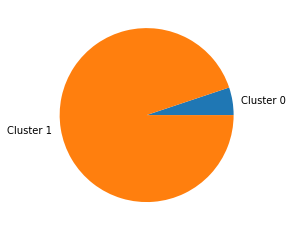

In [27]:
labels = 'Cluster 0', 'Cluster 1'
sizes = [cluster_zero_len, cluster_one_len]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)

In [28]:
cluster_one_len

40805

In [29]:
sent = df_tweets[df_tweets['datapoint_id'] == 0]['sentiment'][0]
sent

'Positive'

In [ ]:
sum_of_accuracies = 0
total_true_clusters = len(eval_list)
count = 0
for index, tweet_cluster in enumerate(eval_list):
    current_true_sent = df_tweets[df_tweets['datapoint_id'] == 0]['sentiment'][0]
    truly_clustered_tweet_count = 0
    for tweet_id in tweet_cluster:
        # Calculate the percentage of all tweets that belong to the same cluster as the first tweet
        current_tweet_sent = df_tweets[df_tweets['datapoint_id'] == tweet_id]['sentiment'].tolist()[0]
        if current_tweet_sent == current_true_sent:
            truly_clustered_tweet_count += 1
    current_cluster_length = len(tweet_cluster)
    current_cluster_accuracy = truly_clustered_tweet_count/current_cluster_length
    sum_of_accuracies += current_cluster_accuracy
    if count < 25:
        print(sum_of_accuracies)
    count += 1

1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
18.0
18.0
18.0
18.0
18.0
18.0
19.0


In [ ]:
print(sum_of_accuracies)

In [ ]:
mean_accuracy = sum_of_accuracies/total_true_clusters
print(mean_accuracy)